In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [33]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [34]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [35]:
df = df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Text(0.5, 1.0, 'Label')

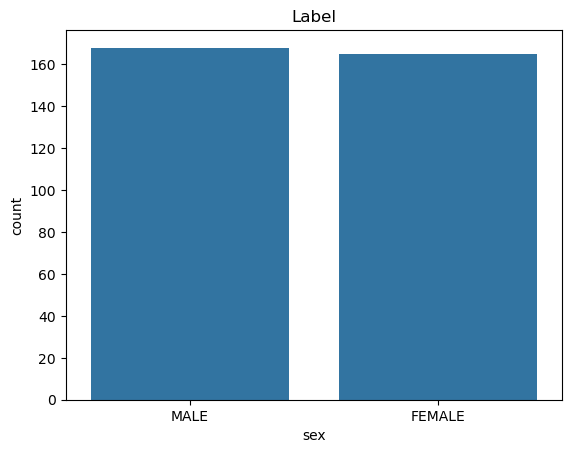

In [36]:
sns.countplot(data = df, x="sex")
plt.xlabel("sex")
plt.ylabel("count")
plt.title("Label")

In [37]:
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

print(df.head())

   species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0        0       2              41             56                  5   
1        0       2              44             43                 10   
2        0       2              50             49                 19   
4        0       2              21             62                 17   
5        0       2              43             73                 14   

   body_mass_g  sex  
0           30    1  
1           32    0  
2           11    0  
4           18    0  
5           26    1  


C:\Users\문도\AppData\Local\Temp\ipykernel_7252\2009209856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\문도\AppData\Local\Temp\ipykernel_7252\2009209856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
C:\Users\문도\AppData\Local\Temp\ipykernel_7252\2009209856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Text(0.5, 1.0, 'Label')

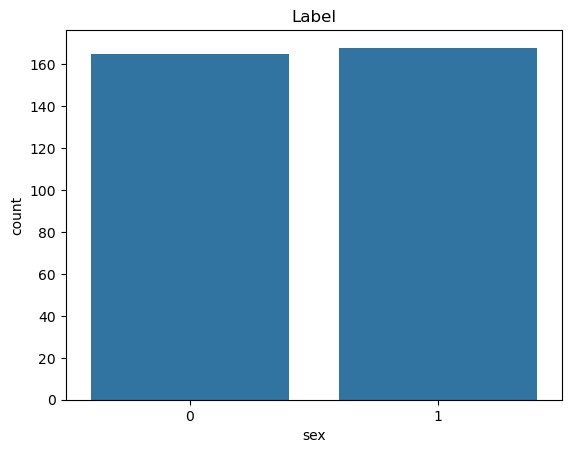

In [38]:
sns.countplot(data = df, x="sex")
plt.xlabel("sex")
plt.ylabel("count")
plt.title("Label")

In [39]:
df['sex'].value_counts()

sex
1    168
0    165
Name: count, dtype: int64

In [40]:
X=df.drop('sex',axis=1)
X

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0,2,41,56,5,30
1,0,2,44,43,10,32
2,0,2,50,49,19,11
4,0,2,21,62,17,18
5,0,2,43,73,14,26
...,...,...,...,...,...,...
338,2,0,107,6,37,68
340,2,0,104,12,38,65
341,2,0,135,26,45,86
342,2,0,88,17,35,75


In [41]:
y=df['sex']
y.value_counts()

sex
1    168
0    165
Name: count, dtype: int64

In [42]:
Y = pd.get_dummies(y).values
Y

array([[False,  True],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [Fal

In [43]:
X = X.values
X

array([[  0,   2,  41,  56,   5,  30],
       [  0,   2,  44,  43,  10,  32],
       [  0,   2,  50,  49,  19,  11],
       ...,
       [  2,   0, 135,  26,  45,  86],
       [  2,   0,  88,  17,  35,  75],
       [  2,   0, 130,  30,  36,  79]], dtype=int64)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((266, 6), (266, 2), (67, 6), (67, 2))

In [45]:
model = Sequential()

model.add(Dense(64, input_shape = (6,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

F:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,090 (12.07 KB)

 Trainable params: 3,090 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4444 - loss: 5.2674 - val_accuracy: 0.5970 - val_loss: 1.8114
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4307 - loss: 1.8438 - val_accuracy: 0.3284 - val_loss: 1.0664
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5370 - loss: 0.9112 - val_accuracy: 0.4328 - val_loss: 1.1185
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5922 - loss: 0.8315 - val_accuracy: 0.5075 - val_loss: 0.8836
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6530 - loss: 0.6728 - val_accuracy: 0.5970 - val_loss: 0.7219
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6651 - loss: 0.6740 - val_accuracy: 0.5821 - val_loss: 0.6520
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6837 - loss: 0.6090 - val_accuracy: 0.5821 - val_loss: 0.6240
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7244 - loss: 0.5945 - val_accuracy: 0.6119 - val_loss: 0.5756
Epoch 9

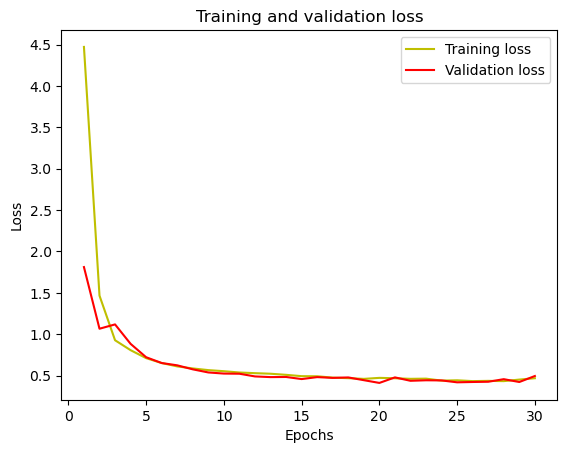

In [47]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

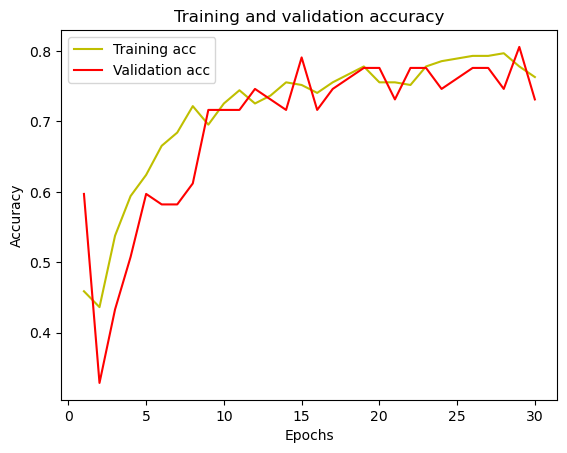

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print("accuracy : \n", classification_report(y_test_class,y_pred_class))
print("confusion_matrix : \n", confusion_matrix(y_test_class,y_pred_class))

accuracy : 
               precision    recall  f1-score   support

           0       0.96      0.59      0.73        41
           1       0.60      0.96      0.74        26

    accuracy                           0.73        67
   macro avg       0.78      0.77      0.73        67
weighted avg       0.82      0.73      0.73        67

confusion_matrix : 
 [[24 17]
 [ 1 25]]
